In [229]:
import numpy as np

In [230]:
class dense_layer:
    def __init__(self,input_size,number_of_neurons):
        
        """input_size : number of features in inpput to the neoran, 
            number_of_neurons : Neurons in each layer 
        """
        self.weights = 0.01*np.random.randn(input_size,number_of_neurons)
        self.bias = np.zeros((1,number_of_neurons))
    
    def forward(self,input_data):
        self.input_data = input_data
        self.output = np.dot(input_data,self.weights)+self.bias
    
    def backward(self,dvalues):
        self.dweights = np.dot(self.input_data.T,dvalues)
        self.dbias = np.sum(dvalues,axis=0,keepdims=True)
        self.dinputs = np.dot(dvalues,self.weights.T)

In [231]:
class relu_activation:
    """Has forward and backward function"""
    def forward(self,input_data):
        """input_data : data as input"""
        self.input_data = input_data
        self.output = np.maximum(0,input_data)
    
    def backward(self,dvalues):
        """dvalues : derivative matrix with all the front layers with respect to loss """
        self.dinputs = dvalues.copy()
        self.dinputs[self.input_data<=0]=0

In [232]:
class softmax_activation:
    def forward(self,input):
        exp_input = np.exp(input - np.max(input,axis=1,keepdims=True))
        self.output = exp_input / np.sum(exp_input,axis=1,keepdims=True)

In [233]:
class Loss:
    def calculate(self,y_pred,y_actual):
        negative_log_likelihood = self.forward(y_pred,y_actual)
        loss = np.mean(negative_log_likelihood)
        return loss


class Categorical_cross_entropy(Loss):
    def forward(self,y_pred,y_actual):
        self.y_pred_clip = np.clip(y_pred,1e-7,1-1e-7)

        if y_actual.ndim==1:
            correct_confidence = self.y_pred_clip[range(len(y_pred)),y_actual]
        elif y_actual.ndim==2:
            correct_confidence = np.sum(y_actual*self.y_pred_clip,axis=1)
        else:
            raise ValueError("y_actual should be 1-dimensional (label encoded) or 2-dimensional (one-hot encoded).")
        
        negative_log_likelihood = -np.log(correct_confidence)
        return negative_log_likelihood
    

In [234]:
class softmax_categoricalcrossentropy:
    def __init__(self):
        self.softmax = softmax_activation()
        self.cross_entropy = Categorical_cross_entropy()

    def forward(self,inputs,y_actual):
        self.softmax.forward(inputs)
        self.outputs = self.softmax.output
        return self.cross_entropy.calculate(self.outputs,y_actual)
        
    def backward(self,y_pred,y_actual):
        number_of_data = len(y_pred)
    
        if y_actual.ndim == 1:
            number_of_class = y_pred.shape[1]
            y_actual = np.eye(number_of_class)[y_actual] # Converting to one hot encoding
        
        self.dinputs = y_pred-y_actual
        self.dinputs = self.dinputs/number_of_data

In [235]:
class metric:
    def accuracy(self,final_output,y_actual):
        final_prediction = np.argmax(final_output,axis=1)

        if y_actual.ndim==2: # y is onehot encodeed
            actual_prediction = np.argmax(y_actual,axis=1)
        elif y_actual.ndim==1:
            actual_prediction = y_actual
        else:
            raise ValueError("y_actual should be 1-dimensional (label encoded) or 2-dimensional (one-hot encoded).")
         
        accu = np.mean(final_prediction==actual_prediction)
        return accu

In [236]:
class SGD_Optimizer:
    def __init__(self,learning_rate) -> None:
        self.learning_rate = learning_rate

    def update_para(self,layer):
        layer.weights +=  (-self.learning_rate * layer.dweights)
        layer.bias += (-self.learning_rate * layer.bias)

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs 
from nnfs.datasets import spiral_data
nnfs.init()

x,y = spiral_data(samples=100,classes=3)

<function matplotlib.pyplot.show(close=None, block=None)>

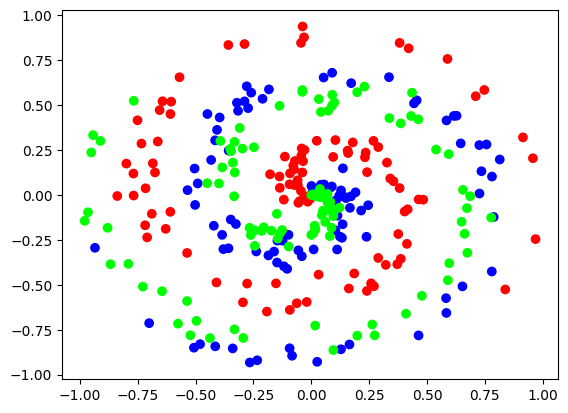

In [238]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='brg')
plt.show

In [239]:
denselayer1=dense_layer(2,64)
relu1=relu_activation()
denselayer2=dense_layer(64,3)
softmax_and_cceloss=softmax_categoricalcrossentropy()
m=metric()
weight_update = SGD_Optimizer(0.01)
l_accuracy = []

    
for i in range(10000):

    denselayer1.forward(x)
    relu1.forward(denselayer1.output)
    denselayer2.forward(relu1.output)
    # print(denselayer2.weights[:5])
    loss=softmax_and_cceloss.forward(denselayer2.output,y)
    print(loss)
    y_predicted = softmax_and_cceloss.outputs
    ac=m.accuracy(y_predicted,y)
    print(f'{i} th ieteration accuracy is  {ac}')
    l_accuracy.append(ac)

    softmax_and_cceloss.backward(y_predicted,y)
    denselayer2.backward(softmax_and_cceloss.dinputs)
    relu1.backward(denselayer2.dinputs)
    denselayer1.backward(relu1.dinputs)

    weight_update.update_para(denselayer2)
    weight_update.update_para(denselayer1)

    # print(denselayer1.weights)

max_value = max(l_accuracy)
print(f"Max value: :", max_value)

1.0985943
0 th ieteration accuracy is  0.36
1.0985943
1 th ieteration accuracy is  0.36
1.0985942
2 th ieteration accuracy is  0.36
1.098594
3 th ieteration accuracy is  0.36333333333333334
1.098594
4 th ieteration accuracy is  0.36333333333333334
1.0985938
5 th ieteration accuracy is  0.36333333333333334
1.0985938
6 th ieteration accuracy is  0.36333333333333334
1.0985936
7 th ieteration accuracy is  0.36333333333333334
1.0985936
8 th ieteration accuracy is  0.36333333333333334
1.0985936
9 th ieteration accuracy is  0.36333333333333334
1.0985935
10 th ieteration accuracy is  0.36333333333333334
1.0985935
11 th ieteration accuracy is  0.36333333333333334
1.0985934
12 th ieteration accuracy is  0.36333333333333334
1.0985934
13 th ieteration accuracy is  0.36333333333333334
1.0985931
14 th ieteration accuracy is  0.36333333333333334
1.0985931
15 th ieteration accuracy is  0.36333333333333334
1.0985931
16 th ieteration accuracy is  0.36333333333333334
1.0985929
17 th ieteration accuracy i